In [1]:
import pandas as pd
import math as m


def calculate_phi(px, py):
    return m.atan2(py,px)

def calculate_theta(px, py, pz):
    return m.atan2(m.sqrt(px**2 + py**2), pz)

def calculate_eta(px, py, pz):
    theta = calculate_theta(px, py, pz)
    return -1. * m.log(m.tan(theta/2))

def dR(x1,y1,z1, x2,y2,z2):
    phi1 = calculate_phi(x1,y1)
    eta1 = calculate_eta(x1,y1,z1)
    phi2 = calculate_phi(x2,y2)
    eta2 = calculate_eta(x2,y2,z2)
    dphi = phi1 - phi2
    #dphi = if |dphi| > m.pi: dphi -= 2*m.pi
    deta = eta1 - eta2
    return m.sqrt(dphi**2 + deta**2)

sample = pd.read_csv(
    "data/toymc/ttbar_1_30ll_test.csv"
)
col = ["bpx","bpy","bpz","bmass", "abpx","abpy","abpz","abmass", "j_1px", "j_1py", "j_1pz", "j_1mass", "j_2px", "j_2py", "j_2pz", "j_2mass"]
df = sample[col]

# adding new columns for the angle phi
df = df.assign(dR1=df.apply(lambda x: dR(x["bpx"], x["bpy"], x["bpz"], x["j_1px"], x["j_1py"], x["j_1pz"]), axis=1))
df = df.assign(dR1x2=df.apply(lambda x: dR(x["bpx"], x["bpy"], x["bpz"], x["j_2px"], x["j_2py"], x["j_2pz"]), axis=1))
df = df.assign(dR2=df.apply(lambda x: dR(x["abpx"], x["abpy"], x["abpz"], x["j_2px"], x["j_2py"], x["j_2pz"]), axis=1))
df = df.assign(dR2x1=df.apply(lambda x: dR(x["abpx"], x["abpy"], x["abpz"], x["j_1px"], x["j_1py"], x["j_1pz"]), axis=1))


Text(0.5, 1.0, 'dR2x1')

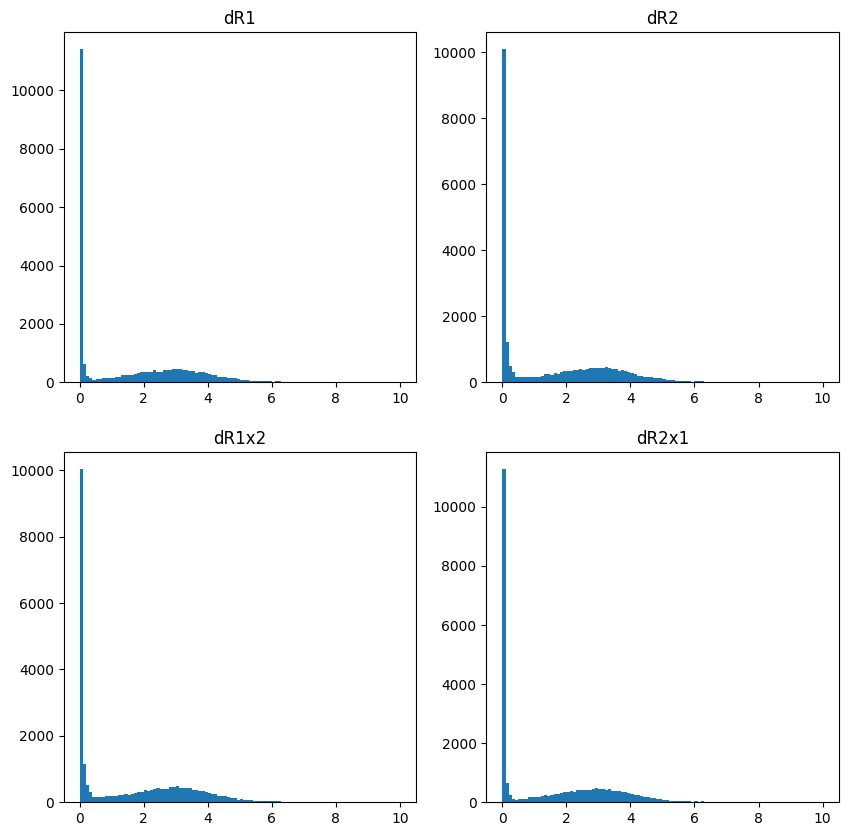

In [2]:
# draw the histogram of dR1, dR2, dR1x2, and dR2x1
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df["dR1"], bins=100, range=(0, 10))
axs[0, 0].set_title("dR1")
axs[0, 1].hist(df["dR2"], bins=100, range=(0, 10))
axs[0, 1].set_title("dR2")
axs[1, 0].hist(df["dR1x2"], bins=100, range=(0, 10))
axs[1, 0].set_title("dR1x2")
axs[1, 1].hist(df["dR2x1"], bins=100, range=(0, 10))
axs[1, 1].set_title("dR2x1")


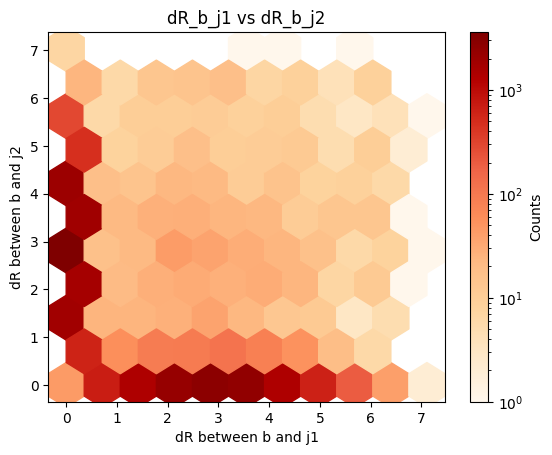

In [3]:
# draw scatter plot of dR1 vs dR1x2 with density in log scale
fig, ax = plt.subplots()
hb = ax.hexbin(df["dR1"], df["dR1x2"], gridsize=10, cmap='OrRd', bins='log')
ax.set_title("dR_b_j1 vs dR_b_j2")
ax.set_xlabel("dR between b and j1")
ax.set_ylabel("dR between b and j2")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts')
plt.show()



In [4]:
# count the number of events with dR1 < 0.4 or dR1x2 < 0.4
print("Number of events with dR1 < 0.4 or dR1x2 < 0.4: ", len(df[(df["dR1"] < 0.4) | (df["dR1x2"] < 0.4)]))
df_odd = df[( (df["dR1"] >= 0.4) & (df["dR1x2"] >= 0.4))]


Number of events with dR1 < 0.4 or dR1x2 < 0.4:  24362


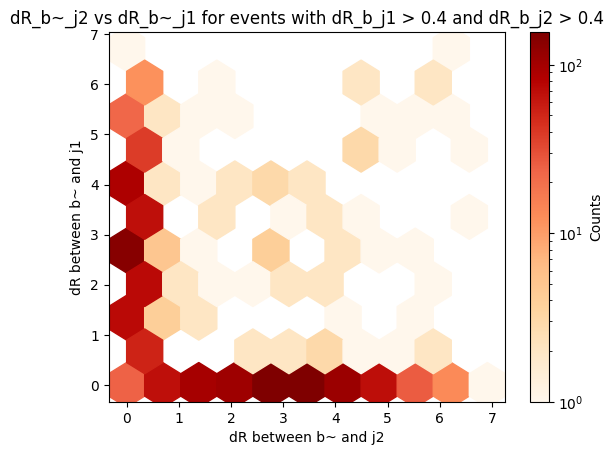

In [5]:

fig, ax = plt.subplots()
hb = ax.hexbin(df_odd["dR2"], df_odd["dR2x1"], gridsize=10, cmap="OrRd", bins="log")
ax.set_title("dR_b~_j2 vs dR_b~_j1 for events with dR_b_j1 > 0.4 and dR_b_j2 > 0.4")
ax.set_xlabel("dR between b~ and j2")
ax.set_ylabel("dR between b~ and j1")
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Counts")
plt.show()

In [6]:
# count the number of events with dR2 < 0.4 or dR2x1 < 0.4
print("Number of events with dR2 < 0.4 or dR2x1 < 0.4: ", len(df_odd[(df_odd["dR2"] < 0.4) | (df_odd["dR2x1"] < 0.4)]))
print(len(df_odd))

Number of events with dR2 < 0.4 or dR2x1 < 0.4:  1399
1473


In [7]:
import hepytorch as hep

myHEP = hep.HEPTorch('./recipes/jet_matcher.json')

In [8]:
result = myHEP.train()

epoch 0, Accuracy: 0.5030068159103394, Loss: 0.6815912127494812
epoch 1, Accuracy: 0.5024248361587524, Loss: 0.6856070756912231
epoch 2, Accuracy: 0.5113481879234314, Loss: 0.6777514219284058
epoch 3, Accuracy: 0.5125121474266052, Loss: 0.6695787310600281
epoch 4, Accuracy: 0.5080504417419434, Loss: 0.6646485328674316
epoch 5, Accuracy: 0.5134820342063904, Loss: 0.6664699912071228
epoch 6, Accuracy: 0.5127061009407043, Loss: 0.6610525846481323
epoch 7, Accuracy: 0.5127061009407043, Loss: 0.6731141805648804
epoch 8, Accuracy: 0.5129001140594482, Loss: 0.6830867528915405
epoch 9, Accuracy: 0.5109602212905884, Loss: 0.6880895495414734
epoch 10, Accuracy: 0.5051406621932983, Loss: 0.6919893622398376
epoch 11, Accuracy: 0.5078564286231995, Loss: 0.6985206007957458
epoch 12, Accuracy: 0.5088263750076294, Loss: 0.6908448338508606
epoch 13, Accuracy: 0.5057225823402405, Loss: 0.6937444806098938
epoch 14, Accuracy: 0.5055286288261414, Loss: 0.6982854604721069
epoch 15, Accuracy: 0.5088263750076

In [ ]:
import shap

# Use X for background and data, convert to numpy for SHAP
background = myHEP.data[:100].numpy()
data_to_explain = myHEP.data[100:200].numpy()

def model_wrapper(x):
	import torch
	return myHEP.model(torch.tensor(x, dtype=torch.float)).detach().numpy()

explainer = shap.Explainer(model_wrapper, background)
feature_names = ["j1_px", "j1_py", "j1_pz", "j1_mass",
                 "l1_px", "l1_py", "l1_pz", "l1_mass",
                 "j2_px", "j2_py", "j2_pz", "j2_mass",
                 "l2_px", "l2_py", "l2_pz", "l2_mass",
                 "met_x", "met_y",
                 "dR_j1_l1", "dR_j1_l2",
                 "dR_j2_l1", "dR_j2_l2"
                ]
explainer.feature_names = feature_names
shap_values = explainer(data_to_explain)

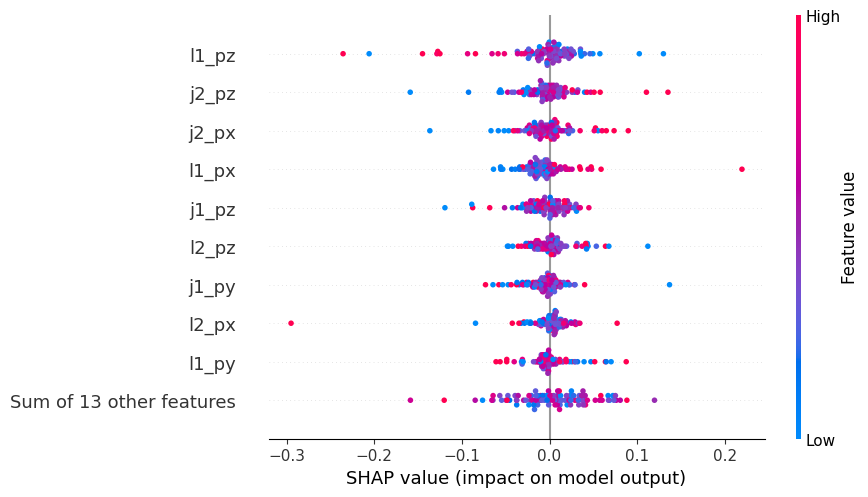

In [24]:
shap.plots.beeswarm(shap_values)
